In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import risk_kit_divit as rk

In [110]:
%matplotlib inline
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ind_return=pd.read_csv('ind30_m_vw_rets.csv',header=0,index_col=0,na_values=-99.99)
ind_return=ind_return/100
ind_return.index = pd.to_datetime(ind_return.index,format="%Y%m").to_period('M')


## The code for implementing the CPPI strategy is in the risk kit. Only its evaluation is shown here.

## Here we have not incorporated drawdown explicitly, so our floor price will remain stagnant and hence, we will allocate higher budget to risky assets. The returns might also be higher (as in the case with beer, as its risky wealth is giving better returns as compared to CPPI), but the potential downside will also be more.

<Axes: >

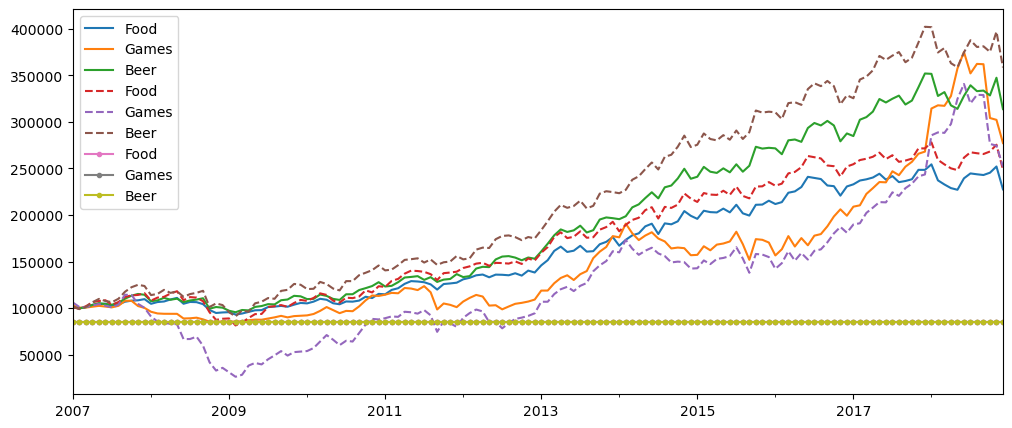

In [115]:
btr=rk.cppi(ind_return["2007":][['Food','Games','Beer']])
ax=btr["Wealth"].plot(figsize=(12,5))
btr["Risky Wealth"].plot(ax=ax,style='--')
btr['Floor History'].plot(ax=ax,style='.-')

## With drawdown mentioned explicitly as a percentage of account value, we can adjust the floor prices accordingly so as to minimize our losses, as shown in the next graph.


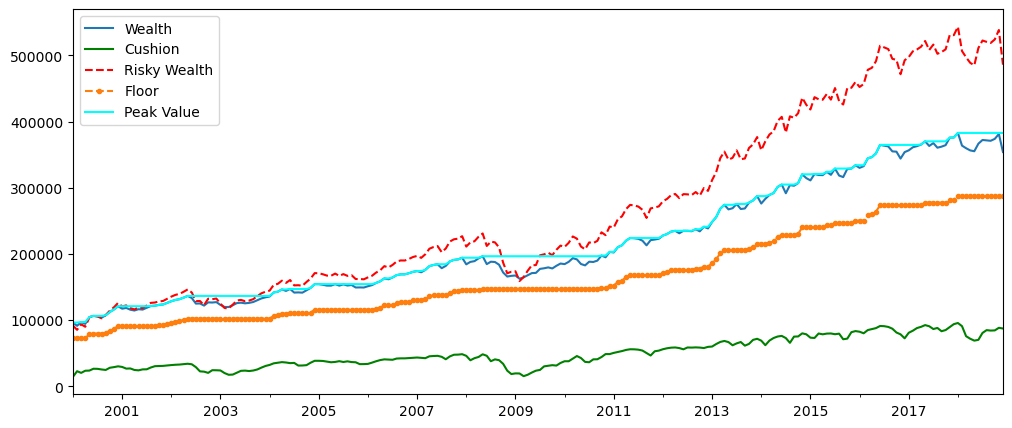

In [116]:
btr=rk.cppi(ind_return["2000":][['Food']],drawdown=0.25) ## This will update floor at every stage
ax=btr["Wealth"].plot(figsize=(12,5))
(btr["Risk Budget"]*btr["Wealth"]).plot(ax=ax,color='g')
btr["Risky Wealth"].plot(ax=ax,style='--',color='r')
btr['Floor History'].plot(ax=ax,style='.--',label="Floor")
btr['Peak Value'].plot(ax=ax,color='cyan')
plt.legend(['Wealth','Cushion','Risky Wealth','Floor','Peak Value'])

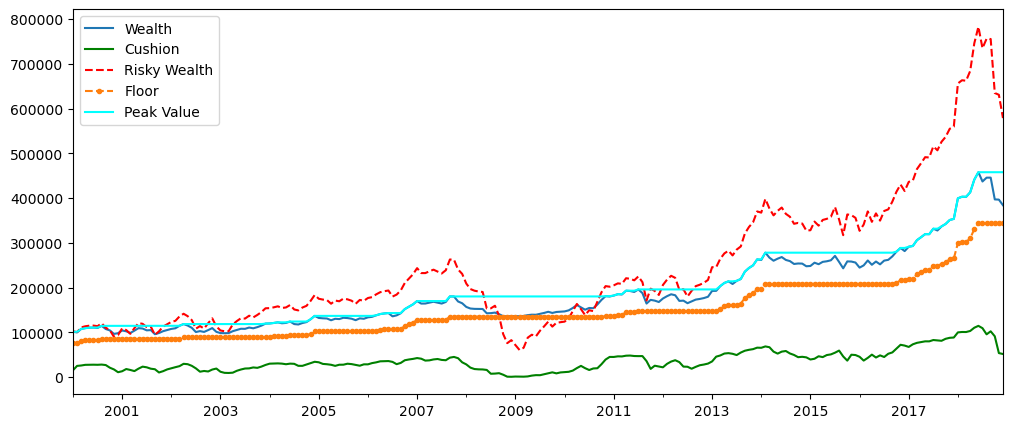

In [120]:
btr=rk.cppi(ind_return["2000":][['Games']],drawdown=0.25)
ax=btr["Wealth"].plot(figsize=(12,5))
(btr["Risk Budget"]*btr["Wealth"]).plot(ax=ax,color='g')
btr["Risky Wealth"].plot(ax=ax,style='--',color='r')
btr['Floor History'].plot(ax=ax,style='.--',label="Floor")
btr['Peak Value'].plot(ax=ax,color='cyan')
plt.legend(['Wealth','Cushion','Risky Wealth','Floor','Peak Value'])

## In the above graph (for Games), the impact of floor prices is evident, as the blue line (account value) never breaches the orange dotted line even though the risky wealth (red line) does, as shown in the graph around the year 2009.

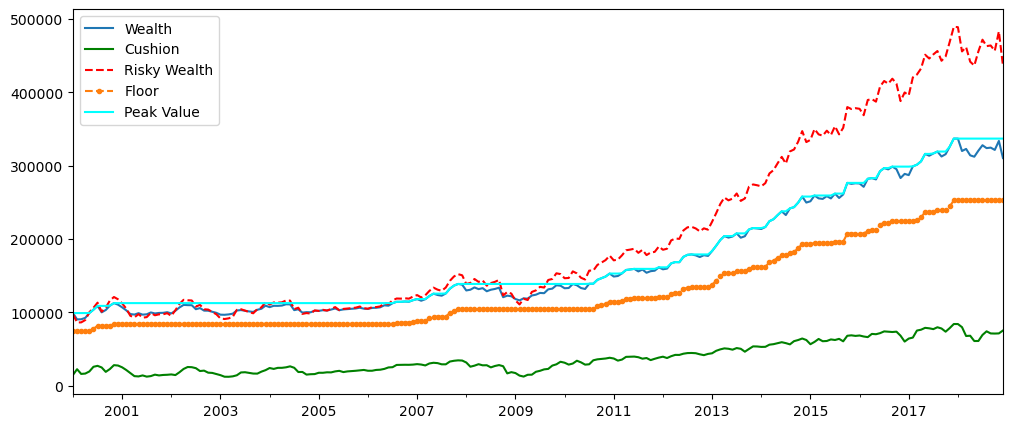

In [118]:
btr=rk.cppi(ind_return["2000":][['Beer']],drawdown=0.25)
ax=btr["Wealth"].plot(figsize=(12,5))
(btr["Risk Budget"]*btr["Wealth"]).plot(ax=ax,color='g')
btr["Risky Wealth"].plot(ax=ax,style='--',color='r')
btr['Floor History'].plot(ax=ax,style='.--',label="Floor")
btr['Peak Value'].plot(ax=ax,color='cyan')
plt.legend(['Wealth','Cushion','Risky Wealth','Floor','Peak Value'])